In [3]:
import numpy as np
import matplotlib.pyplot as plt

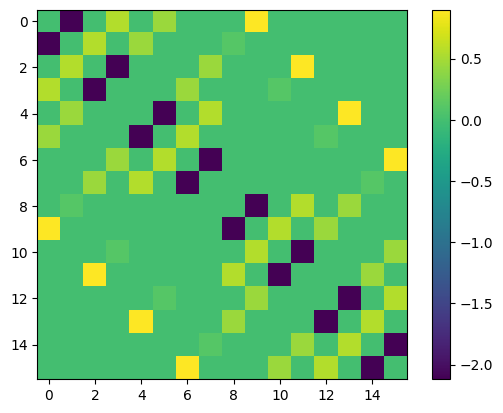

In [19]:
###============================================= Cubic Lattice with two orbitals per site
class Node:
    def __init__(
        self,
        position,
        # data
    ):
        # i, j, k = position
        # self.data = data
        self.position = position  # (i, j, k)
        self.h_coo_p = None
        self.h_coo_m = None

        # positions of neighbors
        self.up = None
        self.down = None
        self.left = None
        self.right = None
        self.front = None
        self.back = None

    def __repr__(self):
        return f'"Node at {self.position}"'

class Lattice:
    def __init__(self, N, t_x, t_y, m, t_2, w):
        self.N = N
        self.t_x = t_x
        self.t_y = t_y
        self.m = m
        self.t_2 = t_2
        self.w = w
        """This function initializes the lattice and the hamiltonian matrix.
        Args:
        N (int) : size of the lattice
        t_x (float): Hopping in x direction
        t_y (float): Hopping in y direction
        m (float): Onsite energy
        t_2 (float): Hopping in z direction
        w (float): disorder strength
        """
        self.nodes = [
            [
                [
                    None for _ in range(N)
                ] for __ in range(N)
            ] for ___ in range(N)
        ]
        # print(self.nodes)
        self.hamiltonian = np.zeros((2*N**3, 2*N**3))
        for x in range(N):
            for y in range(N):
                for z in range(N):
                    self._make_node(x, y, z)

        for x in range(N):
            for y in range(N):
                for z in range(N):
                    # make the connections and make the hamiltonian
                    # there is a row and a column in the hamiltonian matrix for each baloon of each node
                    # (i, j)th  element is 1 iff the ith baloon can go to the jth baloon
                    # hence it will be a symmetric, sparse matrix
                    node = self.nodes[x][y][z]
                    connection = self.nodes[(x+1)%N][y][z]  # periodic boundary conditions along x
                    node.right = connection
                    connection.left = node
                    self._make_hamiltonian(node, connection, (self.t_x/2, self.t_x/2))

                    connection = self.nodes[x][(y+1)%N][z] # periodic boundary conditions along y
                    node.up = connection
                    connection.down = node
                    self._make_hamiltonian(node, connection, (self.t_y/2, self.t_y/2))
                   
                    connection = self.nodes[x][y][(z+1)%N] # periodic boundary conditions along z
                    node.front = connection
                    node.back = connection
                    self._make_hamiltonian(node, connection, ((1-t_2)/2,(1+t_2)/2))

    def _make_node(self, *position):
        # print(position, self.nodes[position[0]][position[1]][position[2]])
        new_node = Node(position)
        self.nodes[position[0]][position[1]][position[2]] = new_node
        return new_node
    
    def _make_hamiltonian(self, node1, node2, scale=1):
        h_coo_p1, h_coo_m1 = self.h_coo(node1)
        h_coo_p2, h_coo_m2 = self.h_coo(node2)
        # Generate a random number in the range [-w/2, w/2]
        W = np.random.uniform(-self.w/2, self.w/2)
        M = np.random.uniform(-self.w/2, self.w/2)
        # neighbour orbital hopping
        self.hamiltonian[h_coo_p1, h_coo_m2] = 1*scale[0]  # my plus to neighbour minus
        self.hamiltonian[h_coo_m2, h_coo_p1] = 1*scale[0]  # neighbour minus to my plus
        self.hamiltonian[h_coo_m1, h_coo_p2] = 1*scale[1]  # my minus to neighbour plus
        self.hamiltonian[h_coo_p2, h_coo_m1] = 1*scale[1]  # neighbour plus to my minus
        # self orbital hopping
        self.hamiltonian[h_coo_p1, h_coo_m1] = -self.m + W 
        self.hamiltonian[h_coo_m1, h_coo_p1] = -self.m + W 
        self.hamiltonian[h_coo_p2, h_coo_m2] = -self.m + W 
        self.hamiltonian[h_coo_m2, h_coo_p2] = -self.m + W 
         ## on-site energy
        self.hamiltonian[h_coo_p1, h_coo_p1] = M
        self.hamiltonian[h_coo_m1, h_coo_m1] = M
        self.hamiltonian[h_coo_p2, h_coo_p2] = M
        self.hamiltonian[h_coo_m2, h_coo_m2] = M
    def h_coo(self, node):
        """Given a node, returns the position of the node in the hamiltonian matrix.

        Args:
            node (Node): Node of the lattice

        Returns:
            h_coo_p, h_coo_m (int, int): Position of the two baloons in the hamiltonian matrix
        """

        if node.h_coo_p is None or node.h_coo_m is None:
            i, j, k = node.position
            # position of the node in the hamiltonian matrix
            n = (i + j*self.N + k*self.N**2)*2

            # set the position of the node in the hamiltonian matrix
            node.h_coo_p = n
            node.h_coo_m = n+1

        return node.h_coo_p, node.h_coo_m

l = Lattice(2, 1.1, 0.9, 2.12, 0.8, 0)
# print(l.hamiltonian)
plt.imshow(l.hamiltonian)
plt.colorbar()

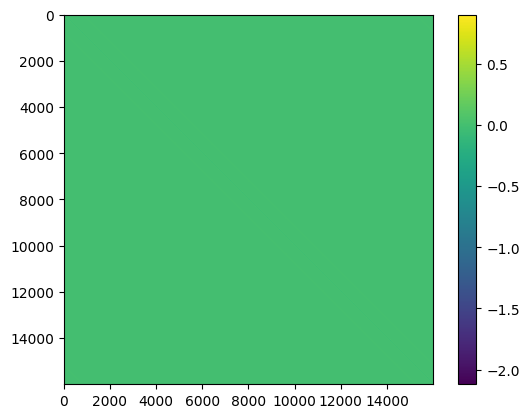

In [21]:
###============================================= Cubic Lattice with two orbitals per site
class Node:
    def __init__(
        self,
        position,
        # data
    ):
        # i, j, k = position
        # self.data = data
        self.position = position  # (i, j, k)
        self.h_coo_p = None
        self.h_coo_m = None

        # positions of neighbors
        self.up = None
        self.down = None
        self.left = None
        self.right = None
        self.front = None
        self.back = None

    def __repr__(self):
        return f'"Node at {self.position}"'

class Lattice:
    def __init__(self, N, t_x, t_y, m, t_2, w):
        self.N = N
        self.t_x = t_x
        self.t_y = t_y
        self.m = m
        self.t_2 = t_2
        self.w = w
        self.nodes = [
            [
                [
                    None for _ in range(N)
                ] for __ in range(N)
            ] for ___ in range(N)
        ]
        # print(self.nodes)
        self.hamiltonian = np.zeros((2*N**3, 2*N**3))
        for x in range(N):
            for y in range(N):
                for z in range(N):
                    self._make_node(x, y, z)

        for x in range(N):
            for y in range(N):
                for z in range(N):
                    # make the connections and make the hamiltonian
                    # there is a row and a column in the hamiltonian matrix for each baloon of each node
                    # (i, j)th  element is 1 iff the ith baloon can go to the jth baloon
                    # hence it will be a symmetric, sparse matrix
                    node = self.nodes[x][y][z]
                    connection = self.nodes[(x+1)%N][y][z]  # periodic boundary conditions along x
                    node.right = connection
                    connection.left = node
                    self._make_hamiltonian(node, connection, (self.t_x/2, self.t_x/2))

                    connection = self.nodes[x][(y+1)%N][z] # periodic boundary conditions along y
                    node.up = connection
                    connection.down = node
                    self._make_hamiltonian(node, connection, (self.t_y/2, self.t_y/2))
                   
                    connection = self.nodes[x][y][(z+1)%N] # periodic boundary conditions along z
                    node.front = connection
                    node.back = connection
                    self._make_hamiltonian(node, connection, ((1-t_2)/2,(1+t_2)/2))

    def _make_node(self, *position):
        # print(position, self.nodes[position[0]][position[1]][position[2]])
        new_node = Node(position)
        self.nodes[position[0]][position[1]][position[2]] = new_node
        return new_node
    
    def _make_hamiltonian(self, node1, node2, scale=1):
        h_coo_p1, h_coo_m1 = self.h_coo(node1)
        h_coo_p2, h_coo_m2 = self.h_coo(node2)
        # Generate a random number in the range [-w/2, w/2]
        W = np.random.uniform(-self.w/2, self.w/2)
        M = np.random.uniform(-self.w/2, self.w/2)
        # neighbour orbital hopping
        self.hamiltonian[h_coo_p1, h_coo_m2] = 1*scale[0]  # my plus to neighbour minus
        self.hamiltonian[h_coo_m2, h_coo_p1] = 1*scale[0]  # neighbour minus to my plus
        self.hamiltonian[h_coo_m1, h_coo_p2] = 1*scale[1]  # my minus to neighbour plus
        self.hamiltonian[h_coo_p2, h_coo_m1] = 1*scale[1]  # neighbour plus to my minus
        # self orbital hopping
        self.hamiltonian[h_coo_p1, h_coo_m1] = -self.m + W 
        self.hamiltonian[h_coo_m1, h_coo_p1] = -self.m + W 
        self.hamiltonian[h_coo_p2, h_coo_m2] = -self.m + W 
        self.hamiltonian[h_coo_m2, h_coo_p2] = -self.m + W 
         ## on-site energy
        self.hamiltonian[h_coo_p1, h_coo_p1] = M
        self.hamiltonian[h_coo_m1, h_coo_m1] = M
        self.hamiltonian[h_coo_p2, h_coo_p2] = M
        self.hamiltonian[h_coo_m2, h_coo_m2] = M
    def h_coo(self, node):
        """Given a node, returns the position of the node in the hamiltonian matrix.

        Args:
            node (Node): Node of the lattice

        Returns:
            h_coo_p, h_coo_m (int, int): Position of the two baloons in the hamiltonian matrix
        """

        if node.h_coo_p is None or node.h_coo_m is None:
            i, j, k = node.position
            # position of the node in the hamiltonian matrix
            n = (i + j*self.N + k*self.N**2)*2

            # set the position of the node in the hamiltonian matrix
            node.h_coo_p = n
            node.h_coo_m = n+1

        return node.h_coo_p, node.h_coo_m

l = Lattice(20, 1.1, 0.9, 2.12, 0.8, 0)
# print(l.hamiltonian)
plt.imshow(l.hamiltonian)
plt.colorbar()